In [135]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [309]:
fs = pd.read_csv('female.csv')
fs['gender'] = 0
ms = pd.read_csv('male.csv')
ms['gender'] = 1

,name,1,2,3,gender
0,oliver,r,e,v,1
1,joella,a,l,l,0
2,shaina,a,n,i,0
3,georgeanna,a,n,n,0
4,saxon,n,o,x,1
5,vinita,a,t,i,0
6,shirl,l,r,i,0
7,henrique,e,u,q,1
8,ephrem,m,e,r,1
9,camella,a,l,l,0


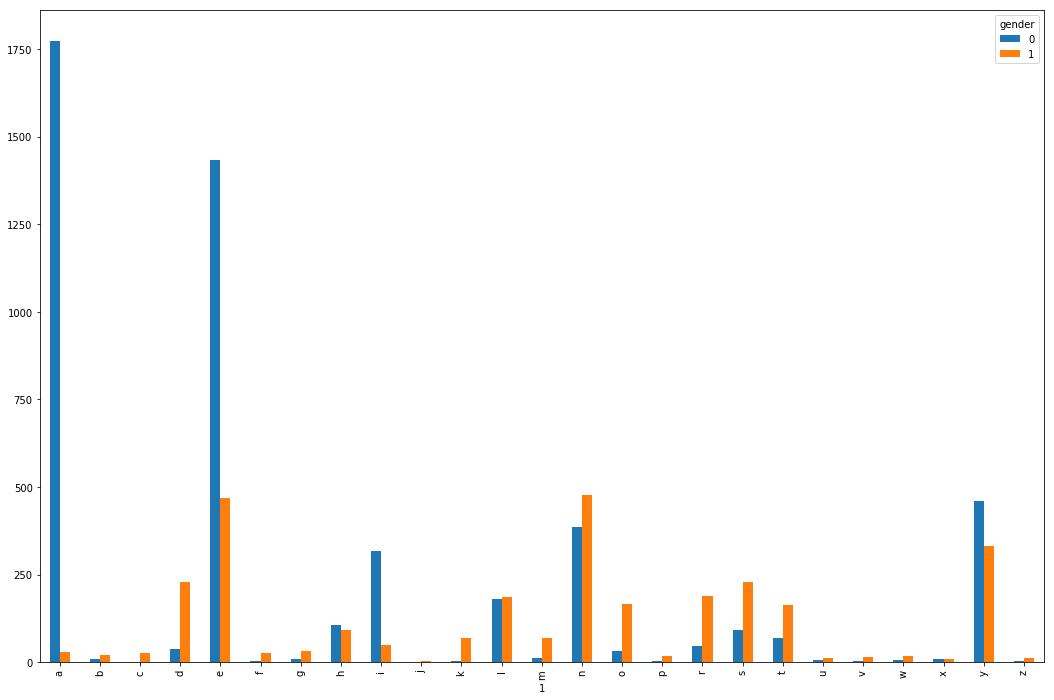

In [310]:
ns = pd.concat([ms, fs])
ns['name'] = [n.strip().lower() for n in ns['name']]
ns = ns.reset_index(drop=True)
ns = ns.reindex(np.random.permutation(ns.index))
ns = ns.reset_index(drop=True)
ns['1'] = [n[-1:   ] for n in ns['name']]
ns['2'] = [n[-2: -1] for n in ns['name']]
ns['3'] = ['_' if len(n) <=2 else n[-3:-2] for n in ns['name']]
ns['count'] = 1
genders = ns.pivot_table(index='1', columns='gender', values='count', aggfunc=np.sum, fill_value=0)
_ = genders.plot(kind='bar', figsize=[18, 12])
genders

ns[['name','1', '2', '3', 'gender']]

In [319]:
d = [{'1': ord(n[-1:])-96, '2': ord(n[-2:-1])-96, '3': 0 if len(n) <= 2 else (ord(n[-3:-2])-96)} for n in ns['name']]
v = DictVectorizer(sparse=False)
x = v.fit_transform(d)

x

#[t for t in d if t['3'] < 0]

array([[18.,  5., 22.],
       [ 1., 12., 12.],
       [ 1., 14.,  9.],
       ...,
       [ 5., 14.,  9.],
       [18., 15., 12.],
       [ 1., 14.,  5.]])

In [320]:
x_train, x_test, y_train, y_test = train_test_split(x, ns.gender, random_state=1, test_size=0.2)
x_train

array([[12., 25., 18.],
       [ 7.,  9.,  1.],
       [ 5.,  9., 14.],
       ...,
       [25.,  5.,  8.],
       [14.,  5., 12.],
       [14.,  1., 12.]])

In [335]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train).score(x_test, y_test) 

0.7035871617369415

In [336]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(max_depth=3, random_state=1)
tr.fit(x_train, y_train).score(x_test, y_test)

0.7747010698552549

In [345]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(22, 48), random_state=1)
nn.fit(x_train, y_train).score(x_test, y_test)

0.7413467589679044